# How to access LUMI's Extremes Digital Twin data using earthkit and the Polytope API

This document serves as a guide for utilizing the [earthkit](https://earthkit.readthedocs.io/en/latest/) library to extract DestinE data stored in [LUMI](https://www.lumi-supercomputer.eu/lumi-selected-as-a-platform-for-destination-earths-climate-change-adaptation-digital-twin/)  and subsequently visualize it using plots. Earthkit functions as a set of tools specifically designed for working with geospatial data, while LUMI represents a data storage and computation facility. DestinE data will be retrieved from LUMI through the earthkit library's functionalities. Following the data extraction, the document will provide instructions on how to generate plots to visually represent the DestinE data.

[Polytope](https://polytope.ecmwf.int/openapi/), an API offered by the European Centre for Medium-Range Weather Forecasts (ECMWF) is leveraged through earthkit to achieve this goal. 

## What you will learn
* How to access and preview the dataset
* How to select the data
* How to plot the results

## Prerequisites 

### Create a virtual environment with required packages

Open a terminal window and run the following commands in sequence.

1. Create a virtual environment: `python -m venv /home/jovyan/polytope`
2. Activate it: `source /home/jovyan/polytope/bin/activate`
3. Install required dependencies for this example Notebook:
```
pip install earthkit-data
pip install earthkit-maps
pip install earthkit-regrid  
pip install cf-units         
pip install --upgrade polytope-client
pip install ecmwflibs
pip install cfgrib
pip install lxml
pip install conflator==0.1.5
pip install ipykernel
```

4. Verify the installation. Open the terminal and run the command:
```
python -m cfgrib selfcheck
```
This should give:
```
Found: ecCodes v2.34.1.
Your system is ready.
```
5. Install kernel `polytope`. Run the command:
```
ipython kernel install --user --name=polytope
```
6. Select the kernel `polytope` from the top-right menu of this notebook

### Get the credentials to access polytope. 

Open the Terminal and run:
```
python desp-authentication.py -u 'username' -p 'password'
```
> The generated access tokens will be written to `~/.polytopeapirc`.

## Accessing and visualising the data

In [1]:
import earthkit.data
import earthkit.maps
import earthkit.regrid

# This request matches a single parameter of the extremes DT, at 4km resolution
# which began production on 2023-12-11

request = {
        "class": "rd",
        "expver": "i7yv",
        "stream": "oper",
        "date": "20231211",
        "time": "0000",
        "type": "fc",
        "levtype": "sfc",
        "step": "0",
        "param": "167"
    }

#data is an earthkit streaming object but with stream=False will download data immediately 
data = earthkit.data.from_source("polytope", "destination-earth", request, address="polytope.apps.lumi.ewctest.link", stream=False)

2024-04-12 07:34:03 - INFO - Sending request...
{'request': 'class: rd\n'
            "date: '20231211'\n"
            'expver: i7yv\n'
            'levtype: sfc\n'
            "param: '167'\n"
            "step: '0'\n"
            'stream: oper\n'
            "time: '0000'\n"
            'type: fc\n',
 'verb': 'retrieve'}
2024-04-12 07:34:05 - INFO - Request accepted. Please poll http://polytope.apps.lumi.ewctest.link/api/v1/requests/93426878-c977-4b0e-b36c-45e5a4a34ecd for status
2024-04-12 07:34:05 - INFO - Checking request status (93426878-c977-4b0e-b36c-45e5a4a34ecd)...
2024-04-12 07:34:05 - INFO - The current status of the request is 'processing'
2024-04-12 07:34:10 - INFO - The current status of the request is 'processed'


In [2]:
style = earthkit.maps.Style(
    levels=range(-40, 31, 5),
    units='celsius',
    extend='both',
)

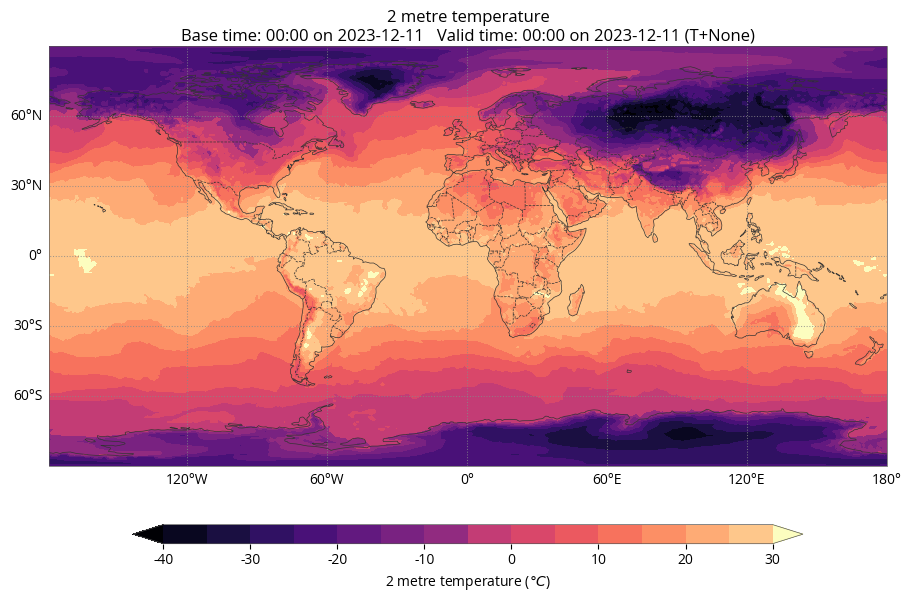

In [3]:
earthkit.maps.quickplot(data, style=style)